<a href="https://colab.research.google.com/github/Denys20233/University/blob/main/Pidhainyi_9_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 9. PySpark


1) Завантжатити датасет https://www.kaggle.com/datasets/soheiltehranipour/cruise-used-for-pyspark

2) Виконати основні функції для спарк, побудувати 3 графіки

In [ ]:
!pip install pyspark==3.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=75dd6902605d7635f8ccf2a22f6c1953173f2baf69e5baf5ed610b1d70eaebe5
  Stored in directory: /root/.cache/pip/wheels/95/13/41/f7f135ee114175605fb4f0a89e7389f3742aa6c1e1a5bcb657
Successfully built pyspark


Створення SparkSession

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
    .master("local[*]")\
    .appName("Colab_PySpark")\
    .getOrCreate()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cruise_dataset.csv to cruise_dataset.csv


Зчитування даних

In [ ]:
data = spark.read.csv(
    'cruise_dataset.csv',
    sep=',',
    header=True,
    inferSchema=True
)

data.printSchema()

root
 |-- Ship_name: string (nullable = true)
 |-- Cruise_line: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tonnage: double (nullable = true)
 |-- passengers: double (nullable = true)
 |-- length: double (nullable = true)
 |-- cabins: double (nullable = true)
 |-- passenger_density: double (nullable = true)
 |-- crew: double (nullable = true)



 Схема даних

In [ ]:
data.schema

StructType([StructField('Ship_name', StringType(), True), StructField('Cruise_line', StringType(), True), StructField('Age', IntegerType(), True), StructField('Tonnage', DoubleType(), True), StructField('passengers', DoubleType(), True), StructField('length', DoubleType(), True), StructField('cabins', DoubleType(), True), StructField('passenger_density', DoubleType(), True), StructField('crew', DoubleType(), True)])

Список кортежів з іменами стовпців і типами даних

In [ ]:
data.dtypes

[('Ship_name', 'string'),
 ('Cruise_line', 'string'),
 ('Age', 'int'),
 ('Tonnage', 'double'),
 ('passengers', 'double'),
 ('length', 'double'),
 ('cabins', 'double'),
 ('passenger_density', 'double'),
 ('crew', 'double')]

Перші 20 рядків data

In [ ]:
data.show() #.head(5), .show(), .first(), take(3)

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|
|    Ecstasy|   Carnival| 22|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Elation|   Carnival| 15|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Fantasy|   Carnival| 23| 

In [ ]:
data.describe()

DataFrame[summary: string, Ship_name: string, Cruise_line: string, Age: string, Tonnage: string, passengers: string, length: string, cabins: string, passenger_density: string, crew: string]

In [ ]:
data.columns

['Ship_name',
 'Cruise_line',
 'Age',
 'Tonnage',
 'passengers',
 'length',
 'cabins',
 'passenger_density',
 'crew']

In [ ]:
data.count()

158

In [ ]:
data.distinct()

DataFrame[Ship_name: string, Cruise_line: string, Age: int, Tonnage: double, passengers: double, length: double, cabins: double, passenger_density: double, crew: double]

Додавання стовпчика passenger_crew_ratio

In [ ]:
data = data.withColumn("passenger_crew_ratio", col("passengers") / col("crew"))

data.show(5)

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+--------------------+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|passenger_crew_ratio|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+--------------------+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|   1.954929577464789|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|   1.954929577464789|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|  2.2179104477611937|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|  1.5570680628272249|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|  2.6420000000000003|
+-----------+-----------+---+------------------+--------

Оновлення колонки

In [ ]:
data = data.withColumnRenamed("passengers", "num_passengers")

data.show(5)

+-----------+-----------+---+------------------+--------------+------+------+-----------------+----+--------------------+
|  Ship_name|Cruise_line|Age|           Tonnage|num_passengers|length|cabins|passenger_density|crew|passenger_crew_ratio|
+-----------+-----------+---+------------------+--------------+------+------+-----------------+----+--------------------+
|    Journey|    Azamara|  6|30.276999999999997|          6.94|  5.94|  3.55|            42.64|3.55|   1.954929577464789|
|      Quest|    Azamara|  6|30.276999999999997|          6.94|  5.94|  3.55|            42.64|3.55|   1.954929577464789|
|Celebration|   Carnival| 26|            47.262|         14.86|  7.22|  7.43|             31.8| 6.7|  2.2179104477611937|
|   Conquest|   Carnival| 11|             110.0|         29.74|  9.53| 14.88|            36.99|19.1|  1.5570680628272249|
|    Destiny|   Carnival| 17|           101.353|         26.42|  8.92| 13.21|            38.36|10.0|  2.6420000000000003|
+-----------+-----------

In [ ]:
# data = data.drop("passenger_density")

Заміна пропущених значень середнім

In [ ]:
from pyspark.sql.functions import mean

# data = data.na.drop()

data = data.na.fill({"crew": data.select(mean(col("crew"))).collect()[0][0]})

data.show(5)

+-----------+-----------+---+------------------+--------------+------+------+-----------------+----+--------------------+
|  Ship_name|Cruise_line|Age|           Tonnage|num_passengers|length|cabins|passenger_density|crew|passenger_crew_ratio|
+-----------+-----------+---+------------------+--------------+------+------+-----------------+----+--------------------+
|    Journey|    Azamara|  6|30.276999999999997|          6.94|  5.94|  3.55|            42.64|3.55|   1.954929577464789|
|      Quest|    Azamara|  6|30.276999999999997|          6.94|  5.94|  3.55|            42.64|3.55|   1.954929577464789|
|Celebration|   Carnival| 26|            47.262|         14.86|  7.22|  7.43|             31.8| 6.7|  2.2179104477611937|
|   Conquest|   Carnival| 11|             110.0|         29.74|  9.53| 14.88|            36.99|19.1|  1.5570680628272249|
|    Destiny|   Carnival| 17|           101.353|         26.42|  8.92| 13.21|            38.36|10.0|  2.6420000000000003|
+-----------+-----------

In [ ]:
data.select('Ship_name').show(5)

data.select(['num_passengers', 'passenger_density', 'crew']).show(5)

+-----------+
|  Ship_name|
+-----------+
|    Journey|
|      Quest|
|Celebration|
|   Conquest|
|    Destiny|
+-----------+
only showing top 5 rows

+--------------+-----------------+----+
|num_passengers|passenger_density|crew|
+--------------+-----------------+----+
|          6.94|            42.64|3.55|
|          6.94|            42.64|3.55|
|         14.86|             31.8| 6.7|
|         29.74|            36.99|19.1|
|         26.42|            38.36|10.0|
+--------------+-----------------+----+
only showing top 5 rows



In [ ]:
data.filter(
    (col("Age") > 20) & (col("Tonnage").between(30, 70))
).show(5)

+-----------+-----------+---+-------+--------------+------+------+-----------------+----+--------------------+
|  Ship_name|Cruise_line|Age|Tonnage|num_passengers|length|cabins|passenger_density|crew|passenger_crew_ratio|
+-----------+-----------+---+-------+--------------+------+------+-----------------+----+--------------------+
|Celebration|   Carnival| 26| 47.262|         14.86|  7.22|  7.43|             31.8| 6.7|  2.2179104477611937|
|    Holiday|   Carnival| 28| 46.052|         14.52|  7.27|  7.26|            31.72| 6.6|                 2.2|
|     Zenith|  Celebrity| 21| 47.225|         13.66|  6.82|  6.87|            34.57| 6.7|   2.038805970149254|
|   Classica|      Costa| 22| 52.926|         13.02|  7.18|  6.54|            40.65|6.17|  2.1102106969205834|
|     Europa|      Costa| 27| 53.872|         14.94|  7.98|  7.67|            36.06|6.36|  2.3490566037735845|
+-----------+-----------+---+-------+--------------+------+------+-----------------+----+--------------------+
o

In [ ]:
from pyspark.sql.functions import when

data.select("Ship_name", "crew", when(col("crew") > 11, 1).otherwise(0).alias("large_crew")).show(5)

+-----------+----+----------+
|  Ship_name|crew|large_crew|
+-----------+----+----------+
|    Journey|3.55|         0|
|      Quest|3.55|         0|
|Celebration| 6.7|         0|
|   Conquest|19.1|         1|
|    Destiny|10.0|         0|
+-----------+----+----------+
only showing top 5 rows



In [ ]:
data.filter(col("Ship_name").rlike("^[Q|R]")).show(5)

+----------------+-----------+---+------------------+--------------+------+------+-----------------+-----+--------------------+
|       Ship_name|Cruise_line|Age|           Tonnage|num_passengers|length|cabins|passenger_density| crew|passenger_crew_ratio|
+----------------+-----------+---+------------------+--------------+------+------+-----------------+-----+--------------------+
|           Quest|    Azamara|  6|30.276999999999997|          6.94|  5.94|  3.55|            42.64| 3.55|   1.954929577464789|
|       Romantica|      Costa| 20|            53.049|         13.44|  7.22|  6.78|            39.47|  6.0|  2.2399999999999998|
|QueenElizabethII|     Cunard| 44|            70.327|         17.91|  9.63|   9.5|            39.27| 9.21|  1.9446254071661235|
|      QueenMary2|     Cunard| 10|             151.4|          26.2| 11.32| 11.34|            57.79|12.53|  2.0909816440542697|
|   QueenVictoria|     Cunard|  6|              90.0|          20.0|  9.64| 10.29|             45.0|  9.

In [ ]:
data.groupBy("Cruise_line").mean("crew").show()

+-----------------+------------------+
|      Cruise_line|         avg(crew)|
+-----------------+------------------+
|            Costa|               7.7|
|              P&O| 8.588333333333333|
|           Cunard|10.246666666666668|
|Regent_Seven_Seas|             3.146|
|              MSC|              7.54|
|         Carnival| 10.13590909090909|
|          Crystal|             5.905|
|           Orient|               3.5|
|         Princess|  9.32235294117647|
|        Silversea|            2.4725|
|         Seabourn|1.6000000000000003|
| Holland_American| 6.215000000000002|
|         Windstar|1.1866666666666668|
|           Disney|              9.45|
|        Norwegian| 8.087692307692308|
|          Oceania|               4.0|
|          Azamara|              3.55|
|        Celebrity|             8.072|
|             Star| 5.363333333333333|
|  Royal_Caribbean|10.016521739130434|
+-----------------+------------------+



Агрегeгування

In [ ]:
from pyspark.sql import functions as f

data.groupBy("Cruise_line") \
    .agg(
        f.min("Age").alias("Мінімальний вік"),
        f.max("Age").alias("Максимальний вік"),
        f.avg("Age").alias("Середній вік"),

        f.min("Tonnage").alias("Мінімальний тоннаж"),
        f.max("Tonnage").alias("Максимальний тоннаж"),
        f.avg("Tonnage").alias("Середній тоннаж"),

        f.min("num_passengers").alias("Мінімум пасажирів"),
        f.max("num_passengers").alias("Максимум пасажирів"),
        f.avg("num_passengers").alias("Середня кількість пасажирів")
    ).show(truncate=False)

+-----------------+---------------+----------------+------------------+------------------+-------------------+------------------+-----------------+------------------+---------------------------+
|Cruise_line      |Мінімальний вік|Максимальний вік|Середній вік      |Мінімальний тоннаж|Максимальний тоннаж|Середній тоннаж   |Мінімум пасажирів|Максимум пасажирів|Середня кількість пасажирів|
+-----------------+---------------+----------------+------------------+------------------+-------------------+------------------+-----------------+------------------+---------------------------+
|Costa            |6              |27              |16.181818181818183|25.0              |112.0              |71.09654545454545 |7.76             |38.0              |19.200000000000003         |
|P&O              |5              |29              |14.0              |45.0              |115.0              |77.85883333333334 |11.78            |35.74             |20.820000000000004         |
|Cunard           |6     

Візуалізація даних

In [ ]:
from matplotlib import pyplot as plt

df = data.toPandas()
df.head()

,Ship_name,Cruise_line,Age,Tonnage,num_passengers,length,cabins,passenger_density,crew,passenger_crew_ratio
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55,1.954930
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55,1.954930
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70,2.217910
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10,1.557068
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00,2.642000


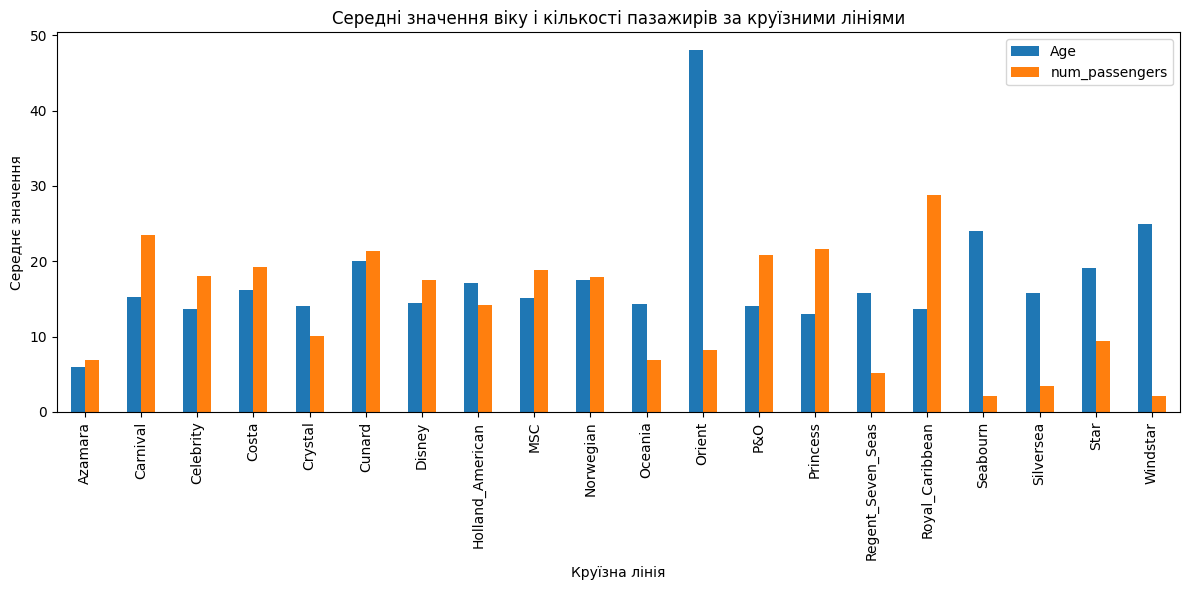

In [ ]:
df_group = df.groupby('Cruise_line').mean(numeric_only=True).reset_index()

df_group.plot(kind='bar', x='Cruise_line', y=['Age', 'num_passengers'], figsize=(12, 6),
              ylabel='Середнє значення', xlabel='Круїзна лінія')
plt.title("Середні значення віку і кількості пазажирів за круїзними лініями")
plt.tight_layout()
plt.show()

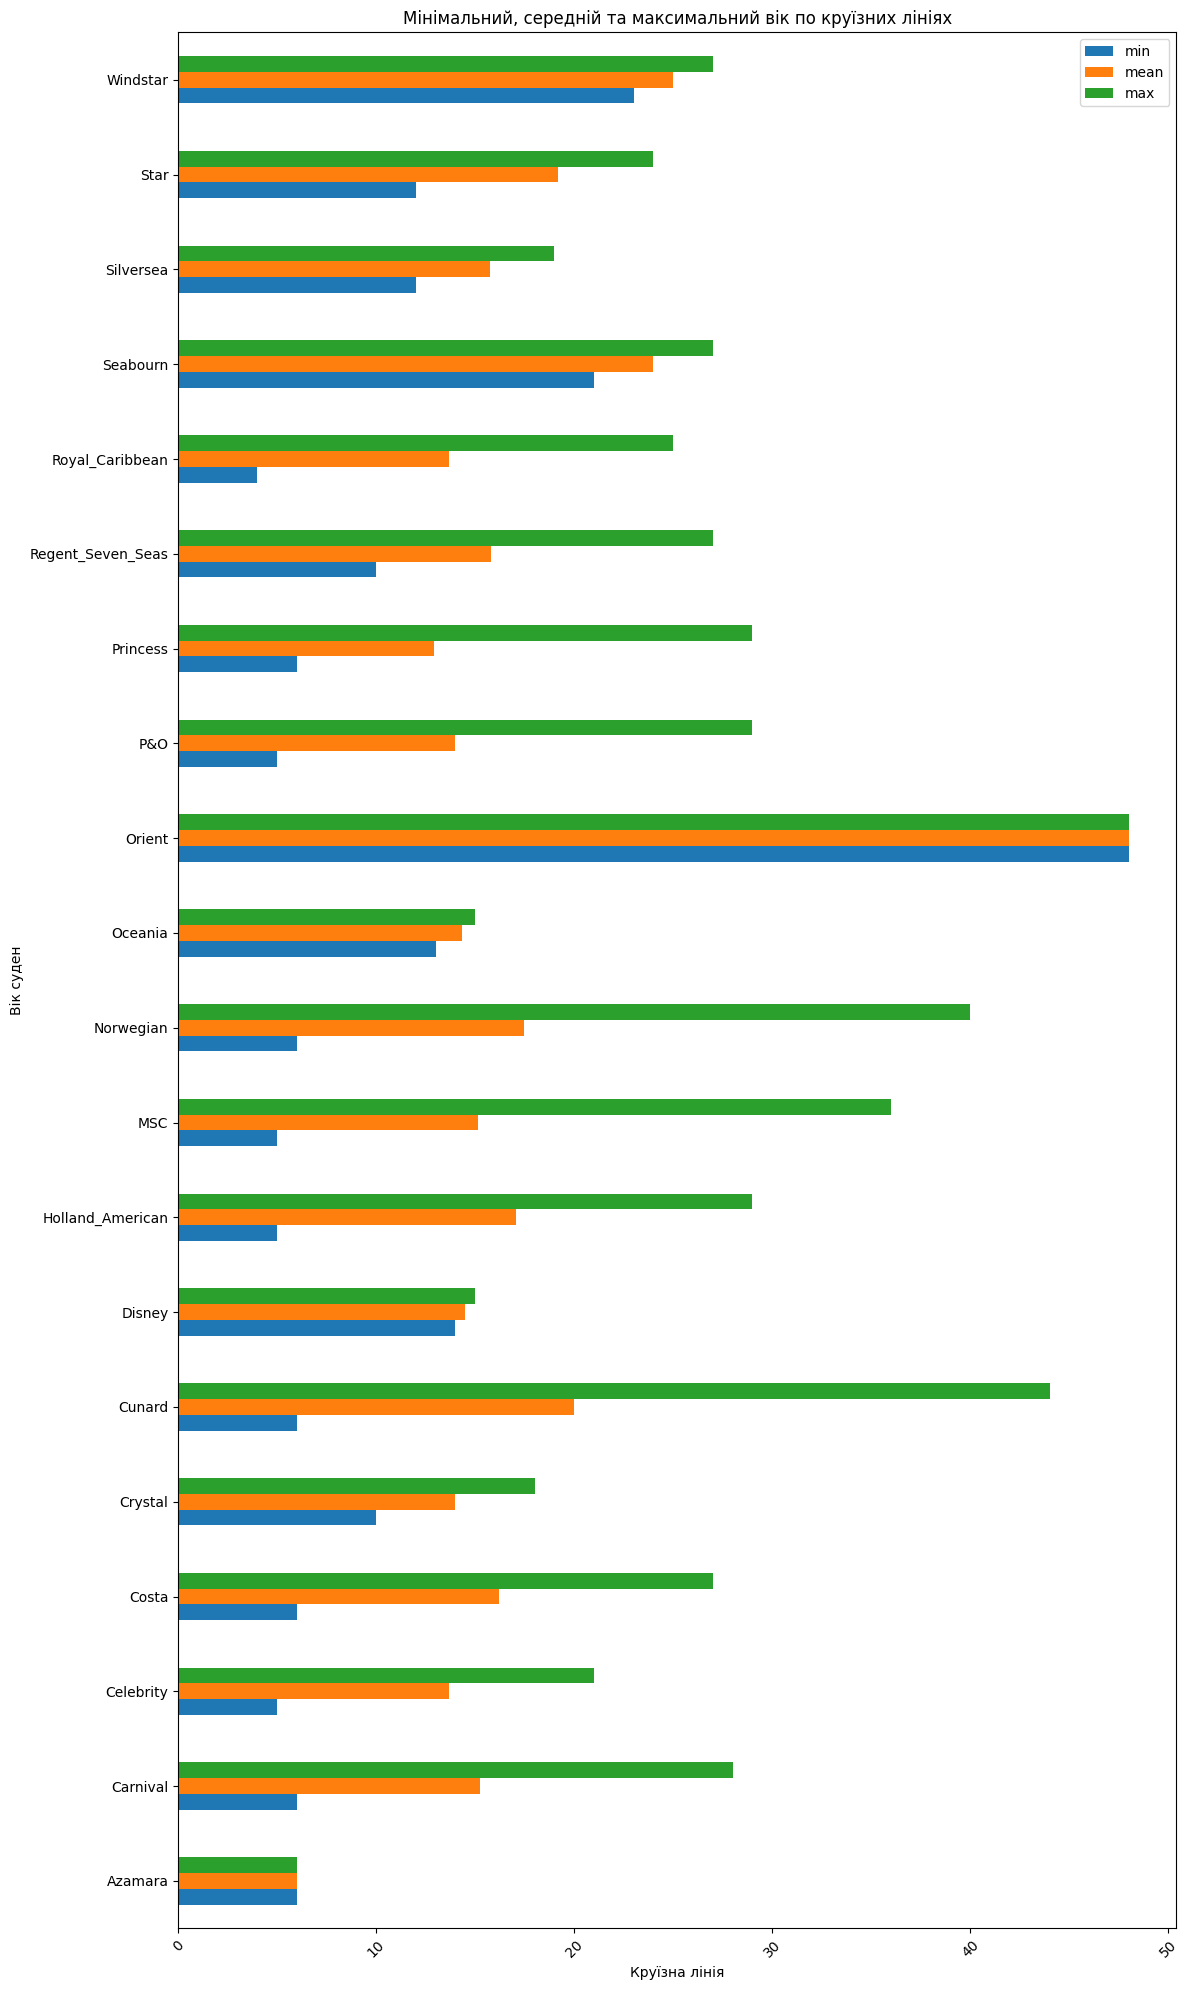

In [ ]:
age = df.groupby('Cruise_line')['Age'].agg(['min', 'mean', 'max']).reset_index()

age.plot(kind='barh', x='Cruise_line', y=['min', 'mean', 'max'],
         figsize=(12, 20), ylabel='Вік суден', xlabel='Круїзна лінія')

plt.title("Мінімальний, середній та максимальний вік по круїзних лініях")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

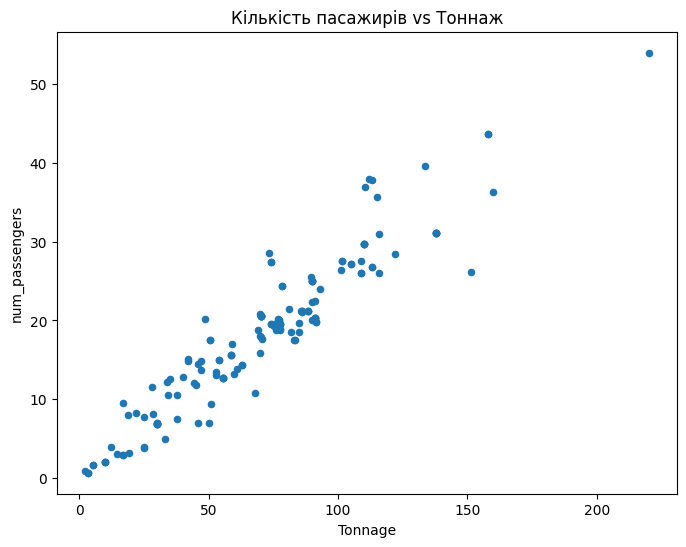

In [ ]:
df.plot(kind='scatter', x='Tonnage', y='num_passengers', figsize=(8, 6))
plt.title('Кореляція між кількістю пасажирів і тоннажем судна')
plt.show()

Запис/збереження даних у файл

In [ ]:
# CSV
data.write.csv('dataset.csv')

# JSON
data.write.save('dataset.json', format='json')

# Parquet
data.write.save('dataset.parquet', format='parquet')

# Записвибраних даних в різні види файлів

# CSV
data.select(['data', 'open', 'close', 'adjusted'])\
    .write.csv('dataset.csv')

# JSON
data.select(['data', 'open', 'close', 'adjusted'])\
    .write.save('dataset.json', format='json')

# Parquet
data.select(['data', 'open', 'close', 'adjusted'])\
    .write.save('dataset.parquet', format='parquet')